# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [ ]:
# Example reading the SQL database from here

# from dotenv import load_dotenv
# from sqlalchemy import create_engine
# import pandas as pd

# # load the .env file variables
# load_dotenv()

# connection_string = f"mysql+pymysql://{os.getenv('DB_USER')}:{os.getenv('DB_PASSWORD')}@{os.getenv('DB_HOST')}/{os.getenv('DB_NAME')}?autocommit=true"
# engine = create_engine(connection_string)
# engine.connect()

# dataframe = pd.read_sql("Select * from books;", engine)
# print(dataframe.describe())

In [ ]:
# Example importing the CSV here

# dataframe = pd.read_csv('../path/to/file.csv')
# dataframe.describe()

In [69]:
import requests
import tweepy
import pandas as pd
import re
import seaborn as sns
import matplotlib as plt
from dotenv import load_dotenv   #for python-dotenv method
load_dotenv()                    

import os 

consumer_key = os.environ.get('CONSUMER_KEY')
consumer_secret = os.environ.get('CONSUMER_SECRET')
bearer_token = os.environ.get('BEARER_TOKEN')


In [70]:
# Creando cliente de Twitter
client = tweepy.Client( bearer_token=bearer_token, 
                        consumer_key=consumer_key, 
                        consumer_secret=consumer_secret,
                        return_type = requests.Response,
                        wait_on_rate_limit=True)







In [71]:

# Definiendo el query para Twitter

query = '#100daysofcode (pandas OR python) -is:retweet'      

tweets = client.search_recent_tweets(query=query, 
                                    tweet_fields=['author_id','created_at','lang'],
                                     max_results= 10)

In [72]:
tweets
#Código 200 = ok

<Response [200]>

In [73]:
tweets_dict = tweets.json()

In [74]:
list(tweets_dict)

['data', 'meta']

In [75]:
list(tweets_data[0])

['created_at', 'author_id', 'text', 'id', 'lang']

In [ ]:
""" Save data as dictionary
3. Extract "data" value from dictionary
4. Transform to pandas Dataframe
5. Take a look at the dataframe to make sure is correct `df.head()`
6. Save the data as a CSV file named coding-tweets.csv"""

In [76]:
tweets_data = tweets_dict['data'] 
df = pd.json_normalize(tweets_data)
df

,author_id,created_at,text,lang,id
0,1285735075557117952,2022-06-25T22:26:53.000Z,@mcklomsjeff @Ambitiousvilla_ @hrmiryne Play a...,en,1540823876145389570
1,1285735075557117952,2022-06-25T22:26:45.000Z,@randm_auto Play and earn #SDV \nComments with...,en,1540823839386599426
2,1285735075557117952,2022-06-25T22:26:37.000Z,@umare7034 @princeezueric33 @Suhaylerh_ Play a...,en,1540823805588815872
3,1285735075557117952,2022-06-25T22:26:28.000Z,@drakenelson12 @hrmiryne @drakenelson_ Play an...,en,1540823768741863425
4,1285735075557117952,2022-06-25T22:26:19.000Z,@drakenelson12 @HRHirene @drakenelson_ Play an...,en,1540823734050856961
5,1285735075557117952,2022-06-25T22:26:12.000Z,@AjibadeResearch Play and earn #SDV \nComments...,en,1540823702803255296
6,1285735075557117952,2022-06-25T22:26:05.000Z,@drakenelson12 @_ella_shay @DdonCharlze @drake...,en,1540823673032118278
7,1285735075557117952,2022-06-25T22:25:58.000Z,@OmololaYusuf82 @OkparaNnaJiAku Play and earn ...,en,1540823644309491716
8,1285735075557117952,2022-06-25T22:25:52.000Z,@i_stefan_j Play and earn #SDV \nComments with...,en,1540823620813037571
9,1285735075557117952,2022-06-25T22:25:36.000Z,@mangatt88 @pb6201 @Mubarak_0_1 Play and earn ...,en,1540823549866393602


In [77]:
df.to_csv("coding-tweets.csv")

In [78]:
list(tweets_data[0])

['author_id', 'created_at', 'text', 'lang', 'id']

In [79]:
df.head()

,author_id,created_at,text,lang,id
0,1285735075557117952,2022-06-25T22:26:53.000Z,@mcklomsjeff @Ambitiousvilla_ @hrmiryne Play a...,en,1540823876145389570
1,1285735075557117952,2022-06-25T22:26:45.000Z,@randm_auto Play and earn #SDV \nComments with...,en,1540823839386599426
2,1285735075557117952,2022-06-25T22:26:37.000Z,@umare7034 @princeezueric33 @Suhaylerh_ Play a...,en,1540823805588815872
3,1285735075557117952,2022-06-25T22:26:28.000Z,@drakenelson12 @hrmiryne @drakenelson_ Play an...,en,1540823768741863425
4,1285735075557117952,2022-06-25T22:26:19.000Z,@drakenelson12 @HRHirene @drakenelson_ Play an...,en,1540823734050856961


In [56]:
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True
    return False


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


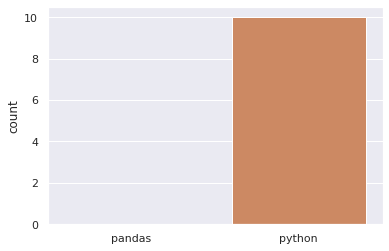

In [68]:
[pandas, python] = [0, 0]

for index, row in df.iterrows():
    pandas += word_in_text("pandas", row["text"])
    python += word_in_text("python", row["text"])

sns.set(color_codes=True)

cd = ["pandas", "python"]

ax = sns.barplot(cd, [pandas, python])
ax.set(ylabel="count")
plt.pyplot.show()
